# Exam 4th of January 2024, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [63]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_inversion` in order to produce samples from the below distribution using rejection sampling:

$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \frac{e^{x^2}-1}{e-1}, & 0 < x < 1 \\
        1, & x \geq 1
    \end{cases}
$$

2. [2p] Produce 100000 samples (**use fewer if it times-out and you cannot find a solution**) and put the answer in `problem1_samples` from the above distribution and plot the histogram together with the true density. *(There is a timeout decorator on this function and if it takes more than 10 seconds to generate 100000 samples it will timeout and it will count as if you failed to generate.)*
3. [2p] Use the above 100000 samples (`problem1_samples`) to approximately compute the integral

$$
    \int_0^{1} \sin(x) \frac{2e^{x^2} x}{e-1} dx
$$
and store the result in `problem1_integral`.

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the integral above and store the result as a tuple in the variable `problem1_interval`

5. [4p] Fill in the remaining part of the function `problem1_inversion_2` in order to produce samples from the below distribution using rejection sampling:
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        20xe^{20-1/x}, & 0 < x < \frac{1}{20} \\
        1, & x \geq \frac{1}{20}
    \end{cases}
$$
Hint: this is tricky because if you choose the wrong sampling distribution you reject at least 9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000 samples within 2 seconds.

In [64]:

# Part 1

import numpy as np
from Utils import timeout

def f(x):
    return (2*np.exp(x**2) * x) / ( np.exp(1) -1)

def F(x):
    return (np.exp(x**2) -1) / (np.exp(1) -1)

@timeout
def problem1_inversion(n_samples=1):
    # Distribution from part 1
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections

    # Return a numpy array of length n_samples
    samples = np.zeros(n_samples)
    accepted_samples = 0 
    while accepted_samples < n_samples:
        x = np.random.uniform(0, 1)
        u = np.random.uniform(0, 1)
        if u <= f(x) / 4:
            samples[accepted_samples] = x
            accepted_samples +=1 

    return samples




TypeError: object of type 'function' has no len()

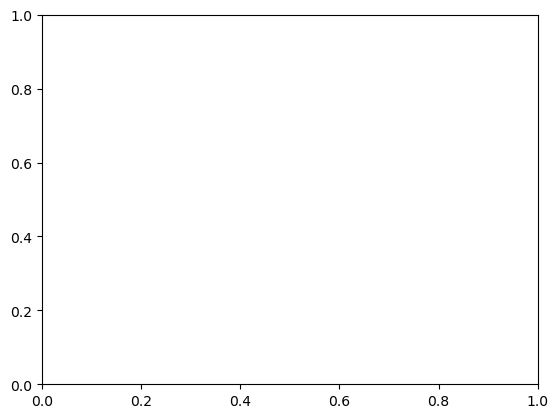

In [65]:
# Part 2
import numpy as np
import matplotlib.pyplot as plt 

problem1_samples = problem1_inversion(100000)
test = np.linspace(0,1,100)


plt.hist(problem1_samples, bins=100, density=True)
plt.plot(test, f(test))
plt.show()

In [ ]:
# Part 3


problem1_integral = np.mean(np.sin(problem1_samples))
print(problem1_integral)


0.6530641622504714


In [ ]:
# Part 4
epsilon = np.sqrt((-(1/(2*100000))) * np.log(0.05/2))

problem1_interval = [problem1_integral - epsilon, problem1_integral + epsilon]
print(problem1_interval)


[np.float64(0.648769468167004), np.float64(0.6573588563339388)]


C:\Users\Maxca\AppData\Local\Temp\ipykernel_24476\2353080500.py:4: RuntimeWarning: divide by zero encountered in divide
  return 20 * (np.exp(20-(1/x))*(1+(1/x)))
C:\Users\Maxca\AppData\Local\Temp\ipykernel_24476\2353080500.py:4: RuntimeWarning: invalid value encountered in multiply
  return 20 * (np.exp(20-(1/x))*(1+(1/x)))


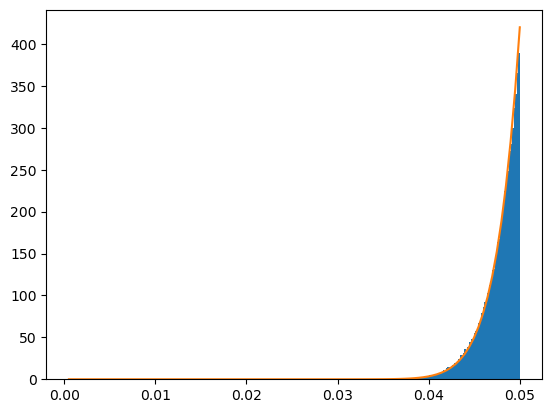

In [ ]:
# Part 5

def f2(x):
    return 20 * (np.exp(20-(1/x))*(1+(1/x)))



def problem1_inversion_2(n_samples=1):
    # Distribution from part 2
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections

    # Return a numpy array of length n_samples

    samples = np.zeros(n_samples)
    accepted_samples = 0 
    M = 1
    while accepted_samples < n_samples:
        x = 1 / (np.random.exponential(1)+20)
        u = np.random.uniform(0, 1/20)
        if u <= f2(x) / M:
            samples[accepted_samples] = x
            accepted_samples +=1 

    
    return samples


problem5_samples = problem1_inversion_2(100000)
test = np.linspace(0,1/20,100)


plt.hist(problem5_samples, bins=100, density=True)
plt.plot(test, f2(test))
plt.show()



---
#### Local Test for Exam vB, PROBLEM 1
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [ ]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_inversion(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion")
else:
    print("Good, your problem1_inversion returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray)) 
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_integral, float)) 
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

try:
    assert(isinstance(problem1_inversion_2(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion_2")
else:
    print("Good, your problem1_inversion_2 returns a numpy array")

Good, your problem1_inversion returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_integral is a float
Good, your problem1_interval is a tuple or list of length 2
Good, your problem1_inversion_2 returns a numpy array


---
## Exam vB, PROBLEM 2
Maximum Points = 13


Let us build a proportional model ($\mathbb{P}(Y=1 \mid X) = G(\beta_0+\beta \cdot X)$ where $G$ is the logistic function) for the spam vs not spam data. Here we assume that the features are presence vs not presence of a word, let $X_1,X_2,X_3$ denote the presence (1) or absence (0) of the words $("free", "prize", "win")$.

1. [2p] Load the file `data/spam.csv` and create two numpy arrays, `problem2_X` which has shape (n_emails,3) where each feature in `problem2_X` corresponds to $X_1,X_2,X_3$ from above, `problem2_Y` which has shape **(n_emails,)** and consists of a $1$ if the email is spam and $0$ if it is not. Split this data into a train-calibration-test sets where we have the split $40\%$, $20\%$, $40\%$, put this data in the designated variables in the code cell.

2. [4p] Follow the calculation from the lecture notes where we derive the logistic regression and implement the final loss function inside the class `ProportionalSpam`. You can use the `Test` cell to check that it gives the correct value for a test-point.

3. [4p] Train the model `problem2_ps` on the training data. The goal is to calibrate the probabilities output from the model. Start by creating a new variable `problem2_X_pred` (shape `(n_samples,1)`) which consists of the predictions of `problem2_ps` on the calibration dataset. Then train a calibration model using `sklearn.tree.DecisionTreeRegressor`, store this trained model in `problem2_calibrator`.

4. [3p] Use the trained model `problem2_ps` and the calibrator `problem2_calibrator` to make final predictions on the testing data, store the prediction in `problem2_final_predictions`. Compute the $0-1$ test-loss and store it in `problem2_01_loss` and provide a $99\%$ confidence interval of it, store this in the variable `problem2_interval`, this should again be a tuple as in **problem1**.

In [ ]:
# Part 1
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv("data/spam.csv", encoding="latin1")
test = np.array(df['v1'])
p = np.vectorize(lambda x: 1 if x == 'spam' else 0)
test = p(test)

k = np.vectorize(lambda x, y: 1 if x in y.lower() else 0)
x_1 = k("free", df['v2'])
x_2 = k("prize", df['v2'])
x_3 = k("win", df['v2'])



problem2_X = np.stack(((x_1,x_2,x_3))).T
problem2_Y = test

X_train, X_test, Y_train, Y_test = train_test_split(problem2_X, problem2_Y, test_size=0.4, random_state=42)
X_train_2 , X_test_2, Y_train_2, Y_test_2 = train_test_split(X_train, Y_train, test_size= 1/3,random_state=42)

problem2_X_train = X_train_2
problem2_X_calib = X_test_2
problem2_X_test = X_test

problem2_Y_train = Y_train_2
problem2_Y_calib = Y_test_2
problem2_Y_test = Y_test

print(problem2_X_train.shape,problem2_X_calib.shape,problem2_X_test.shape,problem2_Y_train.shape,problem2_Y_calib.shape,problem2_Y_test.shape)


(2228, 3) (1115, 3) (2229, 3) (2228,) (1115,) (2229,)


In [ ]:
# Part 2

class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    # define the objective/cost/loss function we want to minimise
    def loss(self,X,Y,coeffs):
        beta_0 = coeffs[0]
        beta = coeffs[1:]
    
        t = beta_0 + np.dot(X, beta) 
        G = 1 / (1 + np.exp(-t))
        loss = np.mean(-(Y*np.log(G) + (1-Y)*np.log(1-G)))
        return loss

    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        #Use the f above together with an optimization method from scipy
        #to find the coefficients of the model
        opt_loss = lambda coeffs: self.loss(X,Y,coeffs)
        initial_arguments = np.zeros(shape=X.shape[1]+1)
        self.result = optimize.minimize(opt_loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
        
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            G = lambda x: np.exp(x)/(1+np.exp(x))
            return np.round(10*G(np.dot(X,self.coeffs[1:])+self.coeffs[0]))/10 # This rounding is to help you with the calibration


In [ ]:
# Part 3

problem2_ps = ProportionalSpam()
problem2_ps.fit(problem2_X_train, problem2_Y_train)

problem2_X_pred = problem2_ps.predict(problem2_X_calib).reshape(-1,1)

problem2_calibrator = DecisionTreeRegressor(max_depth=3, random_state=0)
problem2_calibrator.fit(problem2_X_pred, problem2_Y_calib)


DecisionTreeRegressor(max_depth=3, random_state=0)

In [ ]:
# Part 4



# These are the predicted probabilities

test_probs = problem2_ps.predict(problem2_X_test).reshape(-1,1)
problem2_final_predictions = problem2_calibrator.predict(test_probs)

y_hat = (problem2_final_predictions > 0.5).astype(int)

# In order to compute this loss we first need to convert the predicted probabilities to a decision
# recall the Bayes classifier?
problem2_01_loss = np.mean(y_hat != problem2_Y_test)

# Recall the interval is given as a tuple (a,b) or a list [a,b]

n = len(problem2_Y_test)
p = problem2_01_loss
z = 2.576

epsilon_2 = z * np.sqrt(p*(1-p)/n)


problem2_interval = [p-epsilon_2, p+epsilon_2]

---
#### Local Test for Exam vB, PROBLEM 2
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [ ]:
try:
    import numpy as np
    test_instance = ProportionalSpam()
    test_loss = test_instance.loss(np.array([[1,0,1],[0,1,1]]),np.array([1,0]),np.array([1.2,0.4,0.3,0.9]))
    assert (np.abs(test_loss-1.2828629432232497) < 1e-6)
    print("Your loss was correct for a test point")
except:
    print("Your loss was not correct on a test point")

Your loss was correct for a test point


---
## Exam vB, PROBLEM 3
Maximum Points = 13


Consider the following four Markov chains, answer each question for all chains:

<img width="400px" src="pictures/MarkovA.png">Markov chain A</img>
<img width="400px" src="pictures/MarkovB.png">Markov chain B</img>
<img width="400px" src="pictures/MarkovC.png">Markov chain C</img>
<img width="400px" src="pictures/MarkovD.png">Markov chain D</img>

1. [2p] What is the transition matrix?
2. [2p] Is the Markov chain irreducible?
3. [3p] Is the Markov chain aperiodic? What is the period for each state?
4. [3p] Does the Markov chain have a stationary distribution, and if so, what is it?
5. [3p] Is the Markov chain reversible?

In [ ]:
# PART 1
import numpy as np 

#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)

problem3_A    = np.array([[0.8,0.2,0, 0],
                         [0.6, 0.2, 0.2, 0],
                         [0, 0.4, 0, 0.6],
                         [0, 0, 0.8, 0.2]])
problem3_B    = np.array([[0, 0.2, 0, 0.8],
                          [0, 0, 1, 0],
                          [0, 1, 0, 0],
                          [0.5, 0, 0.5, 0]])
problem3_C    =  np.array([[0.2, 0.3, 0, 0, 0.5],
                          [0.2, 0.2, 0.6, 0, 0],
                          [0, 0.4, 0, 0.6, 0],
                          [0, 0, 0, 0.6, 0.4],
                          [0, 0 ,0 , 0.4, 0.6]])
problem3_D    =  np.array([[0.8, 0.2, 0, 0],
                          [0.6, 0.2, 0.2, 0],
                          [0, 0.4, 0, 0.6],
                          [0.1, 0, 0.7, 0.2]])

In [ ]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False
print(np.linalg.matrix_power(problem3_A, 4))
print(np.linalg.matrix_power(problem3_B, 4))
print(np.linalg.matrix_power(problem3_C, 5))
print(np.linalg.matrix_power(problem3_D, 4))


problem3_A_irreducible = True
problem3_B_irreducible = False
problem3_C_irreducible = False
problem3_D_irreducible = True


[[0.7072 0.2032 0.0608 0.0288]
 [0.6096 0.2192 0.0752 0.096 ]
 [0.3648 0.1504 0.3456 0.1392]
 [0.2304 0.256  0.1856 0.328 ]]
[[0.16 0.   0.84 0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.84 0.   0.16]]
[[0.02024 0.05388 0.04032 0.45944 0.42612]
 [0.03592 0.074   0.08088 0.42832 0.38088]
 [0.01792 0.05392 0.0336  0.4672  0.42736]
 [0.      0.      0.      0.50016 0.49984]
 [0.      0.      0.      0.49984 0.50016]]
[[0.7096 0.2032 0.0584 0.0288]
 [0.624  0.2168 0.0704 0.0888]
 [0.438  0.1552 0.282  0.1248]
 [0.344  0.2412 0.1504 0.2644]]


In [ ]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False

problem3_A_is_aperiodic = True
problem3_B_is_aperiodic = False
problem3_C_is_aperiodic = True
problem3_D_is_aperiodic = True

# Answer the following with the period of the states as a numpy array
# of shape (n_states,)

problem3_A_periods = np.array([1,1,1,1])
problem3_B_periods = np.array([2,2,2,2])
problem3_C_periods = np.array([1,1,1,1,1])
problem3_D_periods = np.array([1,1,1,1])


In [66]:
# PART 4
#------------------------STATIONARY DISTRIBUTION-----------------
# Answer each one with a True or False

problem3_A_has_stationary = True
problem3_B_has_stationary = False
problem3_C_has_stationary = False
problem3_D_has_stationary = True

# Answer the following with the stationary distribution as a numpy array of shape (n_states,)
# if the Markov chain has a stationary distribution otherwise answer with False

matrix = np.transpose(problem3_A)
eigvals, eigvecs = np.linalg.eig(matrix)

result = np.array([-9.30680081e-01, -3.10226694e-01, -1.55113347e-01, -1.16335010e-01])
result = np.abs(result)
result = result / np.sum(result)

matrix2 = np.transpose(problem3_D)
eigvals2, eigvecs2 = np.linalg.eig(matrix2)

result2 = np.array([-0.94153129, -0.29815157, -0.1255375, -0.09415313])
result2 = np.abs(result2)
result2 = result2 / np.sum(result2)



problem3_A_stationary_dist = result
problem3_B_stationary_dist = False
problem3_C_stationary_dist = False
problem3_D_stationary_dist = result2



In [ ]:
# PART 5
#------------------------REVERSIBLE-----------------
# Answer each one with a True or False

def is_reversible(P, pi, tol=1e-4):
    n = P.shape[0]
    for i in range(n):
        for j in range(n):
            if abs(pi[i]*P[i,j] - pi[j]*P[j,i]) > tol:
                return False
    return True

def reversible_violations(P, pi, tol=1e-4):
    n = P.shape[0]
    bad = []
    for i in range(n):
        for j in range(n):
            lhs = pi[i] * P[i,j]
            rhs = pi[j] * P[j,i]
            if abs(lhs - rhs) > tol:
                bad.append((i, j, lhs, rhs))
    return bad

print(is_reversible(problem3_A, result))
print(is_reversible(problem3_D, result2))
print(reversible_violations(problem3_D, result2))


problem3_A_is_reversible = True
problem3_B_is_reversible = False
problem3_C_is_reversible = False
problem3_D_is_reversible = False

True
False
[(0, 1, np.float64(0.12903225890447), np.float64(0.1225806438350473)), (0, 3, np.float64(0.0), np.float64(0.0064516130137460565)), (1, 0, np.float64(0.1225806438350473), np.float64(0.12903225890447)), (1, 2, np.float64(0.04086021461168243), np.float64(0.034408600912710835)), (2, 1, np.float64(0.034408600912710835), np.float64(0.04086021461168243)), (2, 3, np.float64(0.05161290136906625), np.float64(0.04516129109622239)), (3, 0, np.float64(0.0064516130137460565), np.float64(0.0)), (3, 2, np.float64(0.04516129109622239), np.float64(0.05161290136906625))]


NameError: name 'XXX' is not defined